In [1]:
# Generate random 128-bit key, obtain expanded keys for encryption and decryption
from random import getrandbits
from src import expand_key

my_key = getrandbits(128)
encrypt_key, decrypt_key = expand_key(my_key)

print(f'My key:\n{my_key}\n\nExpanded encryption key:\n{encrypt_key}\n\nExpanded decryption key:\n{decrypt_key}')

My key:
278181546922650108310146970846935538509

Expanded encryption key:
[53575, 53550, 48426, 34559, 52086, 26624, 23686, 23373, 23930, 21773, 65430, 60624, 185, 3254, 39842, 36770, 7167, 11737, 40961, 29209, 27959, 17695, 17594, 62634, 45888, 740, 13018, 28298, 16009, 30185, 21559, 65115, 51301, 46301, 5245, 4843, 53928, 28668, 46950, 32773, 47656, 64037, 55205, 20703, 63854, 52480, 2960, 52073, 19375, 19105, 49138, 56730]

Expanded decryption key:
[45333, -49138, -19105, 5276, 2960, 52073, 2163, -63854, -20703, 15344, 47656, 64037, 44604, -46950, -28668, 14564, 5245, 4843, 28882, -51301, -65115, 28922, 16009, 30185, 29248, -13018, -740, 17284, 17594, 62634, 43694, -27959, -29209, 100, 7167, 11737, 43219, -39842, -3254, 3292, 65430, 60624, 19432, -23930, -23373, 33971, 52086, 26624, 39606, -48426, -53550, 61346]


In [2]:
# Format a string into multiple 16-bit integers per IDEA requirements (i.e., first into 64-bit blocks, then sub-splitting into 16-bit blocks)
from src import format_message

my_message = 'The quick brown fox jumped over the lazy dog'
message_fmt = format_message(my_message)

print(f'Message:\n{my_message}\n\nMessage -> 16 bit integers:\n{message_fmt}')

Message:
The quick brown fox jumped over the lazy dog

Message -> 16 bit integers:
[21608, 25888, 29045, 26979, 27424, 25202, 28535, 28192, 26223, 30752, 27253, 28016, 25956, 8303, 30309, 29216, 29800, 25888, 27745, 31353, 8292, 28519, 0, 0]


In [3]:
######################
# ECB OPERATION MODE #
######################

from src import idea_crypt_block

# Encrypt formatted message using encryption key, four 16-bit ints at a time
message_enc = []
for i in range(0, len(message_fmt), 4):
    message_enc.extend(idea_crypt_block(
        message_fmt[i],
        message_fmt[i + 1],
        message_fmt[i + 2],
        message_fmt[i + 3],
        encrypt_key
    ))

# Decrypt encrypted message using decryption key, four 16-bit ints at a time
message_dec = []
for i in range(0, len(message_enc), 4):
    message_dec.extend(idea_crypt_block(
        message_enc[i],
        message_enc[i + 1],
        message_enc[i + 2],
        message_enc[i + 3],
        decrypt_key
    ))

# If all true, then decrypted message is identical to original message
print('ECB IDEA ENCRYPTION/DECRYPTION SUMMARY:')
for i in range(len(message_fmt)):
    print(f'16-bit int: {i}   \tOriginal: {message_fmt[i]}  \tEncrypted: {message_enc[i]}  \t' +
          f'Decrypted: {message_dec[i]}  \tSuccess: {message_fmt[i] == message_dec[i]}')

ECB IDEA ENCRYPTION/DECRYPTION SUMMARY:
16-bit int: 0   	Original: 21608  	Encrypted: 18951  	Decrypted: 21608  	Success: True
16-bit int: 1   	Original: 25888  	Encrypted: 46608  	Decrypted: 25888  	Success: True
16-bit int: 2   	Original: 29045  	Encrypted: 38639  	Decrypted: 29045  	Success: True
16-bit int: 3   	Original: 26979  	Encrypted: 23677  	Decrypted: 26979  	Success: True
16-bit int: 4   	Original: 27424  	Encrypted: 30636  	Decrypted: 27424  	Success: True
16-bit int: 5   	Original: 25202  	Encrypted: 14221  	Decrypted: 25202  	Success: True
16-bit int: 6   	Original: 28535  	Encrypted: 46363  	Decrypted: 28535  	Success: True
16-bit int: 7   	Original: 28192  	Encrypted: 57821  	Decrypted: 28192  	Success: True
16-bit int: 8   	Original: 26223  	Encrypted: 60218  	Decrypted: 26223  	Success: True
16-bit int: 9   	Original: 30752  	Encrypted: 23471  	Decrypted: 30752  	Success: True
16-bit int: 10   	Original: 27253  	Encrypted: 8617  	Decrypted: 27253  	Success: True
16-

In [4]:
######################
# CBC OPERATION MODE #
######################

# Generate initialization vector, four 16-bit integers
init_vector = [getrandbits(16) for _ in range(4)]

# Encrypt the message, four 16-bit ints at a time
message_enc = []
_forward = init_vector
for i in range(0, len(message_fmt), 4):
    message_enc.extend(idea_crypt_block(
        _forward[0] ^ message_fmt[i],
        _forward[1] ^ message_fmt[i + 1],
        _forward[2] ^ message_fmt[i + 2],
        _forward[3] ^ message_fmt[i + 3],
        encrypt_key
    ))
    _forward = message_enc[-4:]

# Decrypt the message, four 16-bit ints at a time
message_dec = []
_forward = init_vector
for i in range(0, len(message_enc), 4):
    _res = idea_crypt_block(
        message_enc[i],
        message_enc[i + 1],
        message_enc[i + 2],
        message_enc[i + 3],
        decrypt_key
    )
    message_dec.extend([_forward[j] ^ _res[j] for j in range(4)])
    _forward = message_enc[i: i + 4]

# If all true, then decrypted message is identical to original message
print('CBC IDEA ENCRYPTION/DECRYPTION SUMMARY:')
for i in range(len(message_fmt)):
    print(f'16-bit int: {i}   \tOriginal: {message_fmt[i]}  \tEncrypted: {message_enc[i]}  \t' +
          f'Decrypted: {message_dec[i]}  \tSuccess: {message_fmt[i] == message_dec[i]}')

CBC IDEA ENCRYPTION/DECRYPTION SUMMARY:
16-bit int: 0   	Original: 21608  	Encrypted: 37542  	Decrypted: 21608  	Success: True
16-bit int: 1   	Original: 25888  	Encrypted: 9814  	Decrypted: 25888  	Success: True
16-bit int: 2   	Original: 29045  	Encrypted: 28982  	Decrypted: 29045  	Success: True
16-bit int: 3   	Original: 26979  	Encrypted: 7211  	Decrypted: 26979  	Success: True
16-bit int: 4   	Original: 27424  	Encrypted: 63004  	Decrypted: 27424  	Success: True
16-bit int: 5   	Original: 25202  	Encrypted: 50721  	Decrypted: 25202  	Success: True
16-bit int: 6   	Original: 28535  	Encrypted: 56630  	Decrypted: 28535  	Success: True
16-bit int: 7   	Original: 28192  	Encrypted: 22685  	Decrypted: 28192  	Success: True
16-bit int: 8   	Original: 26223  	Encrypted: 42731  	Decrypted: 26223  	Success: True
16-bit int: 9   	Original: 30752  	Encrypted: 55044  	Decrypted: 30752  	Success: True
16-bit int: 10   	Original: 27253  	Encrypted: 4433  	Decrypted: 27253  	Success: True
16-bi

In [5]:
# Obtain encryption and decryption time vs. length of message data, ECB operation
import random
from string import ascii_letters
import time

string = ''
delta_enc = []
delta_dec = []
for _ in range(5000):

    string += random.choices(ascii_letters, k=1)[0]
    message_fmt = format_message(string)

    message_enc = []
    t_enc_start = time.time()
    for i in range(0, len(message_fmt), 4):
        message_enc.extend(idea_crypt_block(
            message_fmt[i],
            message_fmt[i + 1],
            message_fmt[i + 2],
            message_fmt[i + 3],
            encrypt_key
        ))
    t_enc_end = time.time()
    delta_enc.append(t_enc_end - t_enc_start)

    message_dec = []
    t_dec_start = time.time()
    for i in range(0, len(message_enc), 4):
        message_dec.extend(idea_crypt_block(
            message_enc[i],
            message_enc[i + 1],
            message_enc[i + 2],
            message_enc[i + 3],
            decrypt_key
        ))
    t_dec_end = time.time()
    delta_dec.append(t_dec_end - t_dec_start)

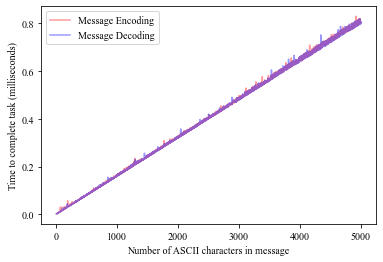

In [6]:
# Plot above data
from matplotlib import pyplot as plt

delta_enc_m = [d * 100 for d in delta_enc]
delta_dec_m = [d * 100 for d in delta_dec]

last_enc = delta_enc_m[-1]
last_dec = delta_dec_m[-1]

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Number of ASCII characters in message')
plt.ylabel('Time to complete task (milliseconds)')
plt.plot([i for i in range(1, len(delta_enc_m) + 1)], delta_enc_m, label='Message Encoding', color='red', alpha=0.4)
plt.plot([i for i in range(1, len(delta_enc_m) + 1)], delta_dec_m, label='Message Decoding', color='blue', alpha=0.4)
plt.legend(loc='upper left')
plt.show()

In [7]:
# Obtain encryption and decryption time vs. length of message data, CBC operation

string = ''
delta_enc = []
delta_dec = []
for _ in range(5000):

    string += random.choices(ascii_letters, k=1)[0]
    message_fmt = format_message(string)

    init_vector = [getrandbits(16) for _ in range(4)]

    message_enc = []
    _forward = init_vector
    t_enc_start = time.time()
    for i in range(0, len(message_fmt), 4):
        message_enc.extend(idea_crypt_block(
            _forward[0] ^ message_fmt[i],
            _forward[1] ^ message_fmt[i + 1],
            _forward[2] ^ message_fmt[i + 2],
            _forward[3] ^ message_fmt[i + 3],
            encrypt_key
        ))
        _forward = message_enc[-4:]
    t_enc_end = time.time()
    delta_enc.append(t_enc_end - t_enc_start)

    message_dec = []
    _forward = init_vector
    t_dec_start = time.time()
    for i in range(0, len(message_enc), 4):
        _res = idea_crypt_block(
            message_enc[i],
            message_enc[i + 1],
            message_enc[i + 2],
            message_enc[i + 3],
            decrypt_key
        )
        message_dec.extend([_forward[j] ^ _res[j] for j in range(4)])
        _forward = message_enc[i: i + 4]
    t_dec_end = time.time()
    delta_dec.append(t_dec_end - t_dec_start)

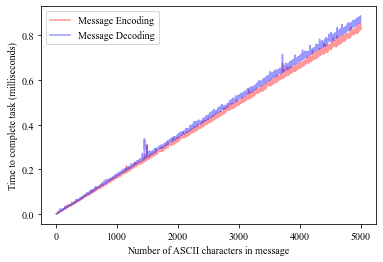

In [8]:
# Plot above data
from matplotlib import pyplot as plt

delta_enc_m = [d * 100 for d in delta_enc]
delta_dec_m = [d * 100 for d in delta_dec]

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Number of ASCII characters in message')
plt.ylabel('Time to complete task (milliseconds)')
plt.plot([i for i in range(1, len(delta_enc_m) + 1)], delta_enc_m, label='Message Encoding', color='red', alpha=0.4)
plt.plot([i for i in range(1, len(delta_enc_m) + 1)], delta_dec_m, label='Message Decoding', color='blue', alpha=0.4)
plt.legend(loc='upper left')
plt.show()

In [9]:
# % difference between encoding and decoding, CBC
print(abs(delta_enc_m[-1] - delta_dec_m[-1]) / delta_enc_m[-1])
# % difference between encoding and decoding, ECB
print(abs(last_enc - last_dec) / last_enc)

0.06292604685799393
0.0020770280695507687


In [10]:
# % difference between CBC and ECB, encoding
print(abs(last_enc - delta_enc_m[-1]) / last_enc)

# % difference between CBC and ECB, decoding
print(abs(last_dec - delta_dec_m[-1]) / last_dec)

0.035962257432793306
0.09886888546725098


In [11]:
# Average % difference between ECB and CBC
print((abs((last_enc - delta_enc_m[-1]) / last_enc) + (abs(last_dec - delta_dec_m[-1])) / last_dec) / 2)

0.06741557145002214
